Os dados foram retirados do Kaggle. 
Vamos realizar uma segmentação de clientes usando K-Means.

Link: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

Vamos seguir os seguintes passos:
- Análise Exploratória dos Dados
- Pré-processamento dos dados
- Clusterização
- Análise dos Clusters (segmentação de clientes)

Começamos importando as bibliotecas para EDA e lendo o dataset

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_excel("marketing_campaign.xlsx")

In [50]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Vemos que há alguns valores ausentes na coluna Income, vamos remover essas linhas.


In [52]:
data.dropna(inplace=True)

In [53]:
data.shape

(2216, 29)

Agora temos 2216 linhas e 29 colunas no nosso dataframe

Feature Engineering 

- Vamos calcular a idade do cliente com base no ano de nascimento
- Vamos simplificar o atributo de estado civil
- Vamos criar um atributo total_gasto
- Vamos simplificar os atributos de educação
- Vamos criar um atributo para quantidade de filhos e um para verificar quem é pai/mãe

In [54]:
data['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [55]:
data['age'] = 2024 - data['Year_Birth']

In [56]:
data["estado_civil"]=data["Marital_Status"].replace({"Married": 1, "Together": 1, "Absurd": 0, "Widow": 0, "YOLO": 0, "Divorced": 0, "Single": 0, "Alone": 0})

C:\Users\hanna\AppData\Local\Temp\ipykernel_13872\875684292.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["estado_civil"]=data["Marital_Status"].replace({"Married": 1, "Together": 1, "Absurd": 0, "Widow": 0, "YOLO": 0, "Divorced": 0, "Single": 0, "Alone": 0})


In [57]:
data['estado_civil'].value_counts()

estado_civil
1    1430
0     786
Name: count, dtype: int64

In [58]:
data['total_gasto'] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [59]:
data["Education"]=data["Education"].replace({"Basic": 0,"2n Cycle": 0, "Graduation": 1, "Master": 2, "PhD": 2})

C:\Users\hanna\AppData\Local\Temp\ipykernel_13872\837976189.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Education"]=data["Education"].replace({"Basic": 0,"2n Cycle": 0, "Graduation": 1, "Master": 2, "PhD": 2})


In [60]:
data['Education'].value_counts()

Education
1    1116
2     846
0     254
Name: count, dtype: int64

In [61]:
data['children'] = data['Kidhome'] + data['Teenhome']

In [62]:
data['is_parent'] = np.where(data.children>0, 1, 0)

Removemos as colunas desnecessárias

In [63]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID", "Kidhome", "Teenhome"]
data = data.drop(to_drop, axis=1)

Agora vamos verificar novamente nossos dados e ver a estatística descritiva

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntFruits            2216 non-null   int64  
 5   MntMeatProducts      2216 non-null   int64  
 6   MntFishProducts      2216 non-null   int64  
 7   MntSweetProducts     2216 non-null   int64  
 8   MntGoldProds         2216 non-null   int64  
 9   NumDealsPurchases    2216 non-null   int64  
 10  NumWebPurchases      2216 non-null   int64  
 11  NumCatalogPurchases  2216 non-null   int64  
 12  NumStorePurchases    2216 non-null   int64  
 13  NumWebVisitsMonth    2216 non-null   int64  
 14  AcceptedCmp3         2216 non-null   int64  
 15  AcceptedCmp4         2216 non-null   int64 

In [65]:
data.describe()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,estado_civil,total_gasto,children,is_parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,1.267148,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,...,0.073105,0.064079,0.013538,0.009477,0.150271,55.179603,0.645307,607.075361,0.947202,0.714350
std,0.652084,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,...,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.478528,602.900476,0.749062,0.451825
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,5.000000,0.000000,0.000000
25%,1.000000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,69.000000,0.000000,0.000000
50%,1.000000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,1.000000,396.500000,1.000000,1.000000
75%,2.000000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,1.000000,1048.000000,1.000000,1.000000
max,2.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,1.000000,2525.000000,3.000000,1.000000


Plotamos algumas variáveis para verificar outliers

<Figure size 640x480 with 0 Axes>

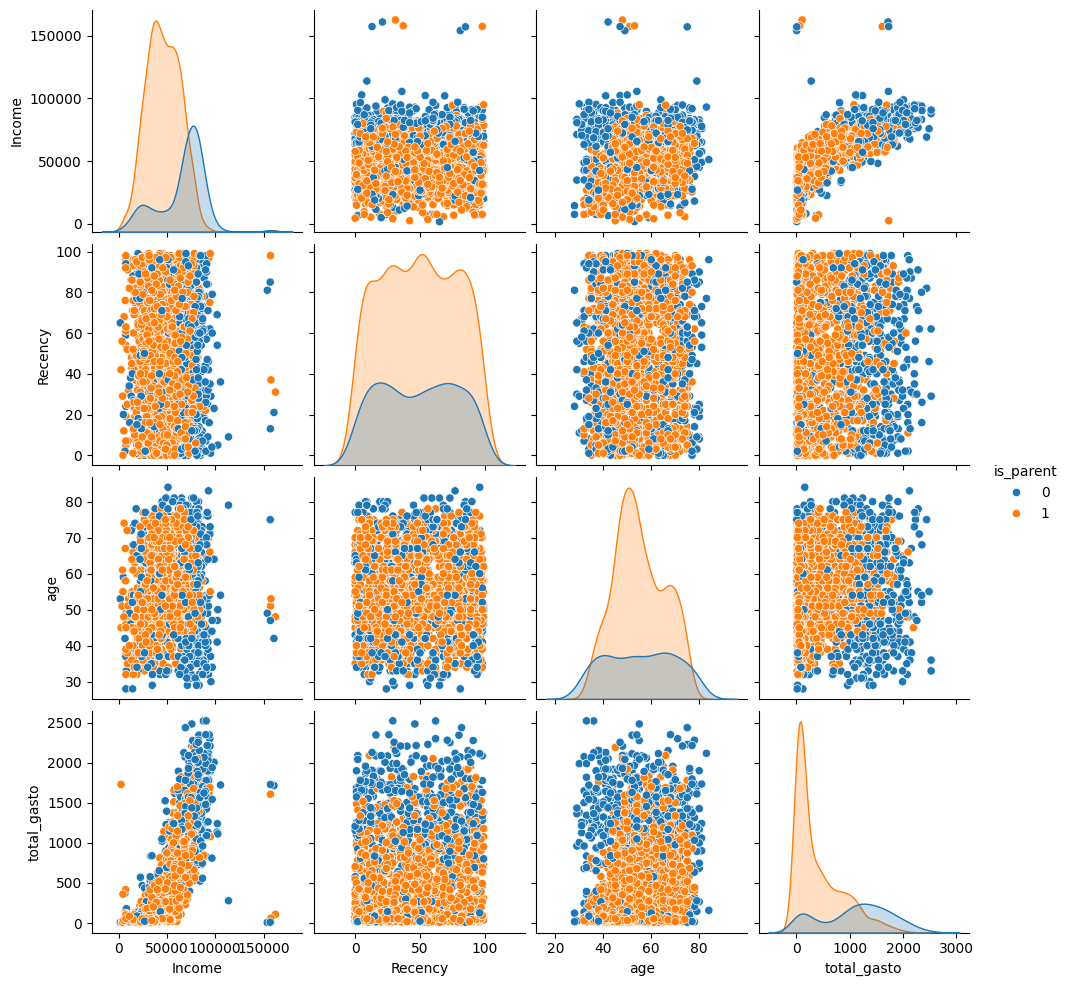

In [102]:

To_Plot = [ "Income", "Recency", "age", "total_gasto", "is_parent"]
plt.figure()
sns.pairplot(data[To_Plot], hue= "is_parent")
#Taking hue 
plt.show()

Temos outliers em Income e Age, então vamos removê-los

In [67]:
data = data[(data["age"]<90)]
data = data[(data["Income"]<600000)]
print("Dados restantes:", len(data))

Dados restantes: 2212


Agora selecionamos as variáveis numéricas para visualizar a matriz de correlação

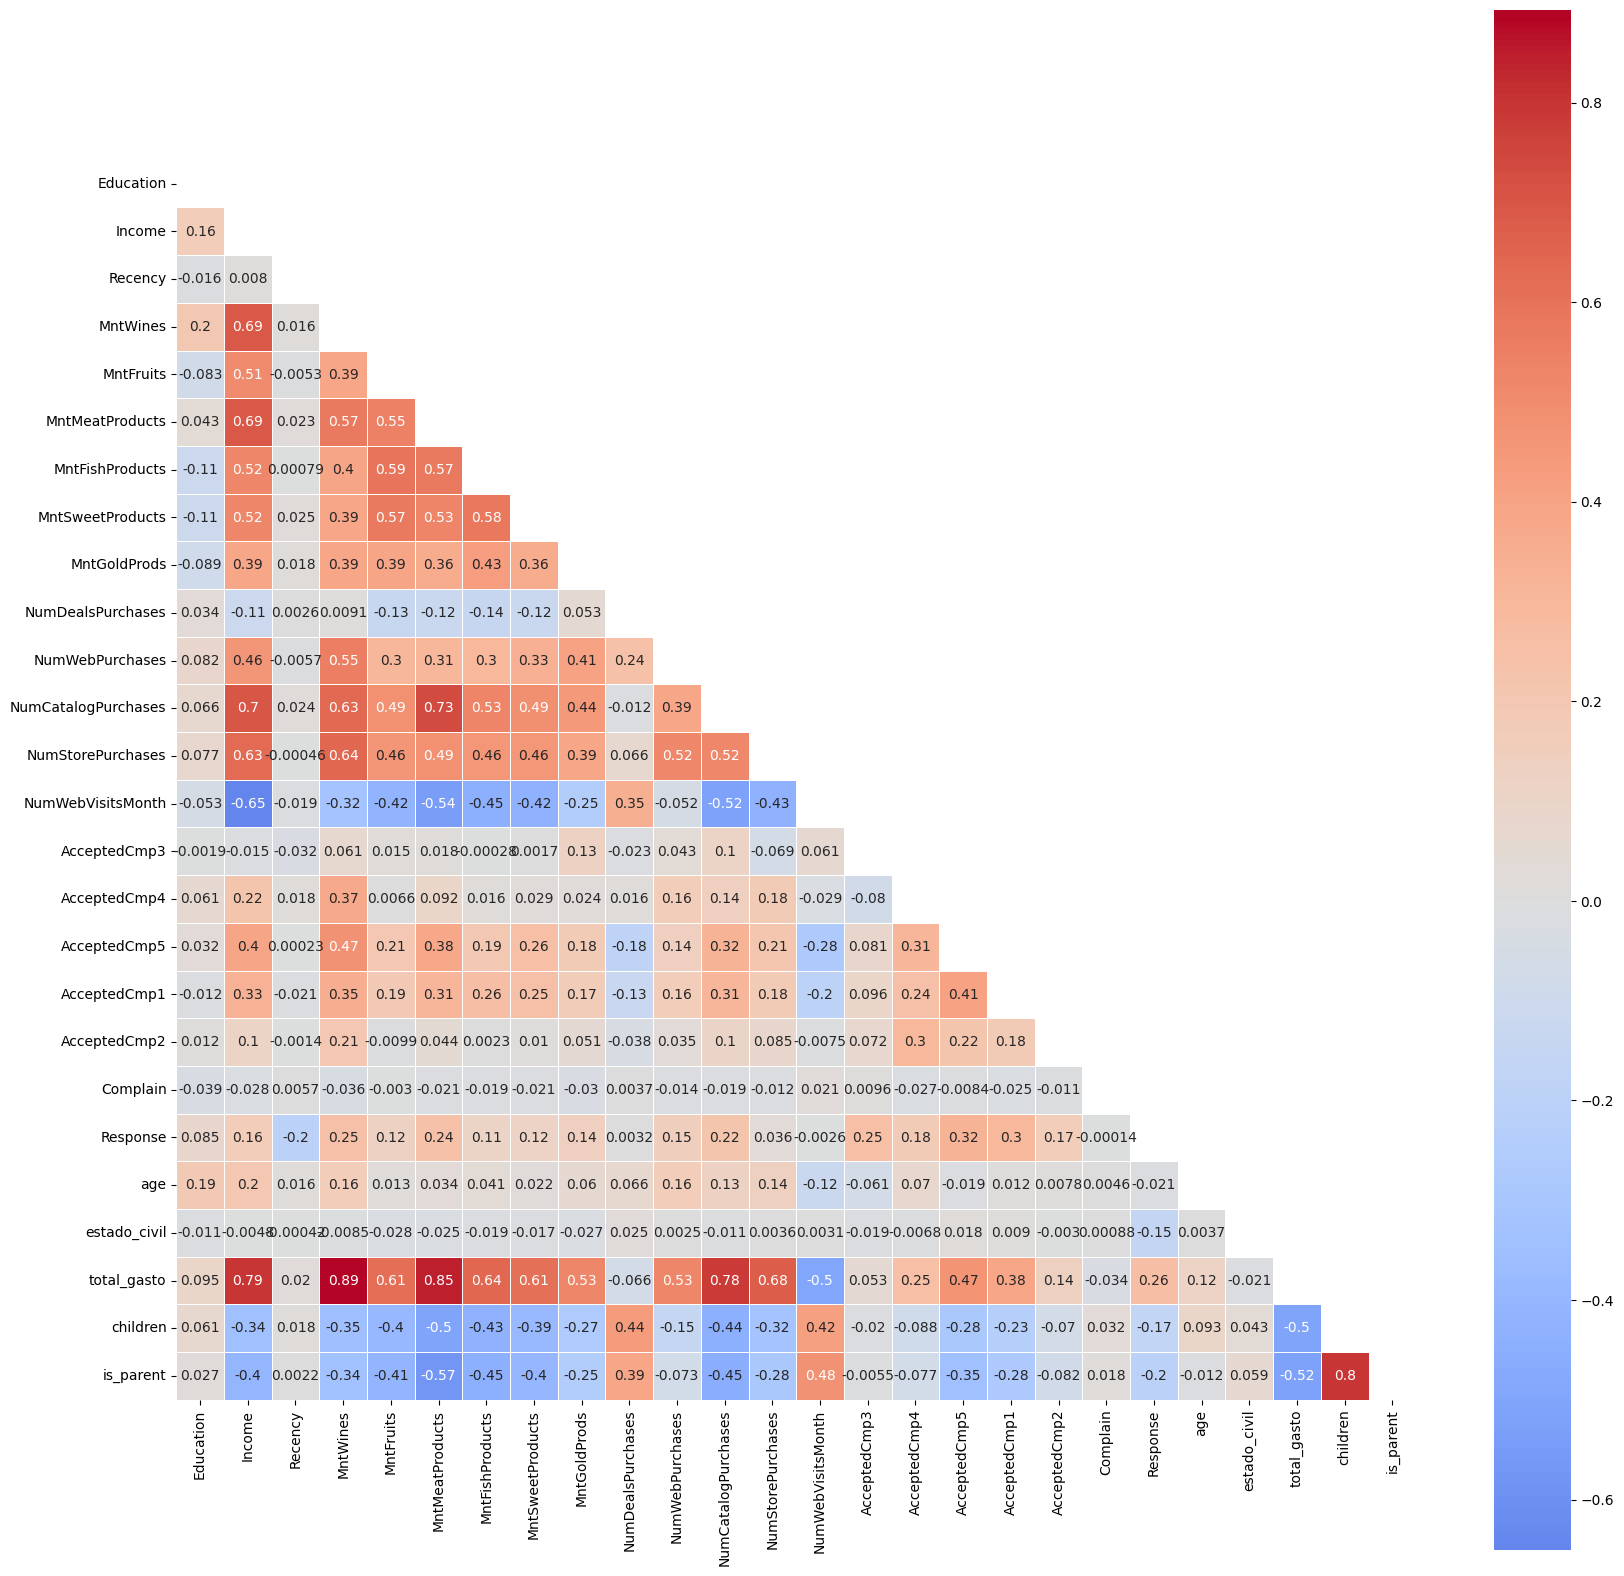

In [68]:
# Selecionar apenas colunas numéricas
numeric_data = data.select_dtypes(include=['number'])

# Calcular a matriz de correlação
corrmat = numeric_data.corr()

# Criar uma máscara para a metade superior
mask = np.triu(np.ones_like(corrmat, dtype=bool))

# Plotar o heatmap
plt.figure(figsize=(20, 20))
# Desenhar o heatmap com a máscara
sns.heatmap(corrmat, mask=mask, annot=True, center=0, cmap='coolwarm', square=True, linewidths=.5)
plt.show()


Tudo certo, agora podemos ir para a próxima etapa...

Pré-processamento dos dados
- Padronizar usando standard scaler
- PCA para redução de dimensionalidade

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
df = data.copy(deep=True)

In [72]:
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

Vamos reduzir a dimensionalidade dos dados.
Nosso dataframe possui 26 atributos e a redução é benéfica pelos seguintes motivos:
- diminuir a influência de atributos irrelevantes
- visualizar os dados em gráficos 3D
- menor esforço computacional
- K-means funciona melhor em dados de menor dimensionalidade

Vamos fazer uma PCA de 3 componentes 

In [73]:
from sklearn.decomposition import PCA 

In [74]:
pca = PCA(n_components=3)
pca_components = pca.fit_transform(scaled_df)

In [75]:
pca_df = pd.DataFrame(pca_components, columns=(['PCA1', 'PCA2', 'PCA3']))

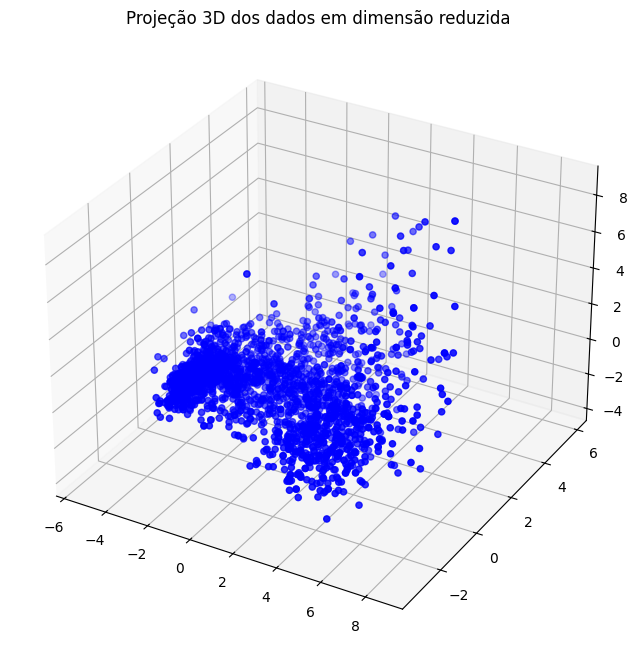

In [76]:
#Projeção 3D dos dados em dimensão reduzida
x =pca_df["PCA1"]
y =pca_df["PCA2"]
z =pca_df["PCA3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="blue", marker="o" )
ax.set_title("Projeção 3D dos dados em dimensão reduzida")
plt.show()

Podemos seguir para o tema principal da aula: K-Means 

A primeira coisa que devemos nos questionar é o número ideal de K, vamos usar o método elbow e o silhouette score

In [77]:
from sklearn.cluster import KMeans

In [78]:
# Lista para armazenar os valores de inércia
inertia = []

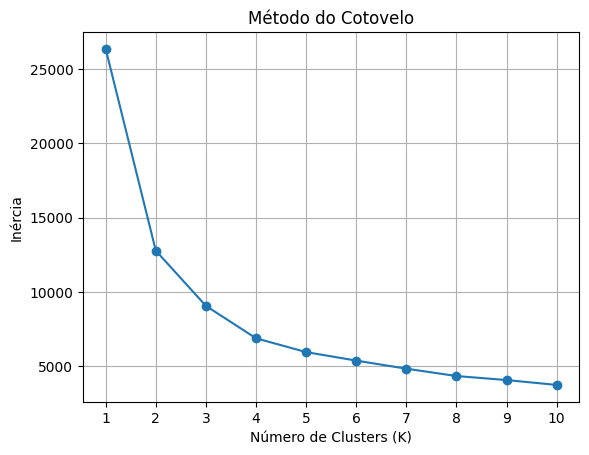

In [79]:
# Iterar sobre diferentes valores de K
for k in range(1, 11):
    # Instanciar o KMeans com o número de clusters (K)
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Treinar o modelo com os dados do pca_df
    kmeans.fit(pca_df)
    # Calcular a inércia e adicioná-la à lista
    inertia.append(kmeans.inertia_)

# Plotar a curva de cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

O gráfico mostra que o número ideal de K está entre 2 e 4, vamos verificar usando o silhouette score

In [80]:
from sklearn.metrics import silhouette_score

In [81]:
# Intervalo de valores de K para testar
K_range = range(2, 11)

silhouette_scores = []

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)


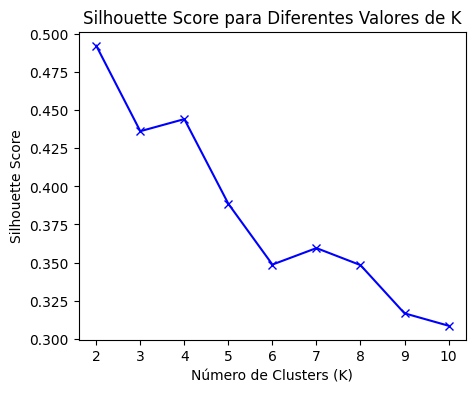

In [82]:
plt.figure(figsize=(5, 4))
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score para Diferentes Valores de K')
plt.show()


O gráfico indica o melhor score para K=2, então assim faremos o agrupamento

In [84]:
# Instanciar o KMeans com 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
# Treinar o modelo com os dados do pca_df
kmeans.fit(pca_df)

# Prever os clusters para os dados do pca_df
clusters = kmeans.predict(pca_df)
 
# Calcular a métrica silhouette
silhouette_avg = silhouette_score(pca_df, clusters)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.49236976804227106


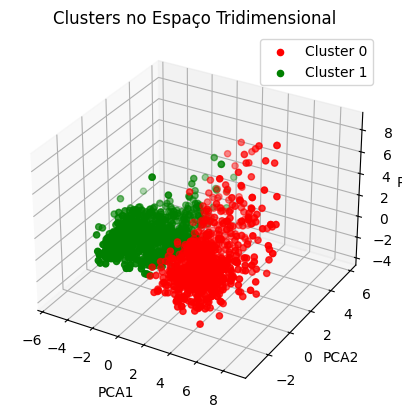

In [85]:
from mpl_toolkits.mplot3d import Axes3D

# Plotar os clusters no espaço tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir cores para cada cluster
colors = ['r', 'g']

# Plotar cada ponto com a cor do seu cluster atribuído
for cluster, color in zip(range(2), colors):
    cluster_points = pca_df[clusters == cluster]
    ax.scatter(cluster_points['PCA1'], cluster_points['PCA2'], cluster_points['PCA3'], c=color, label=f'Cluster {cluster}')

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Clusters no Espaço Tridimensional')
ax.legend()
plt.show()


Vamos testar se o método aglomerativo possui melhor desempenho

In [86]:
from sklearn.cluster import AgglomerativeClustering

In [87]:
# Instanciar o AgglomerativeClustering com 2 clusters
agglomerative = AgglomerativeClustering(n_clusters=2)

# Prever os clusters para os dados do pca_df
agglomerative.fit(pca_df)

# Obter os rótulos dos clusters
agglomerative_clusters = agglomerative.labels_ 

# Calcular a métrica silhouette
silhouette_avg_agglomerative = silhouette_score(pca_df, agglomerative_clusters)
print("Silhouette Score (Agglomerative Clustering):", silhouette_avg_agglomerative)

Silhouette Score (Agglomerative Clustering): 0.4729310437281079


O método aglomerativo não teve melhor desempenho então vamos ficar com o K-Means tradicional

In [97]:
columns_to_examine = [
    "Education",
    "estado_civil",
    "Income",
    "Recency",
    "MntWines",
    "MntFruits",
    "MntMeatProducts",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "age",
    "total_gasto",
    "children",
    "is_parent"
]

In [98]:
cluster_data = df[columns_to_examine].copy()
cluster_data["Cluster"] = clusters

Vamos plotar gráficos para fazer a análise dos clusters

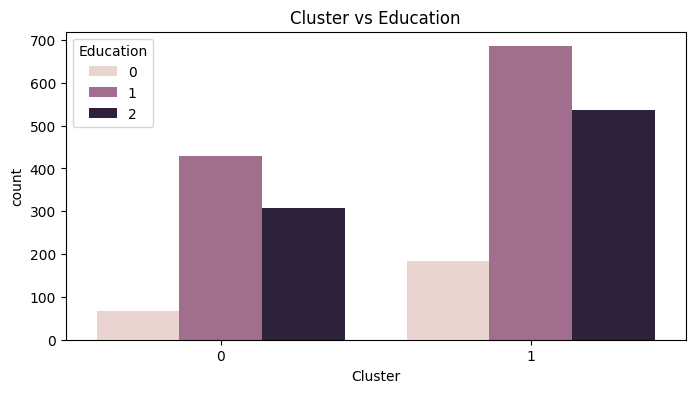

In [99]:
# Primeiro gráfico
plt.figure(figsize=(8, 4))
sns.countplot(data=cluster_data, x="Cluster", hue="Education")
plt.title('Cluster vs Education')
plt.show()

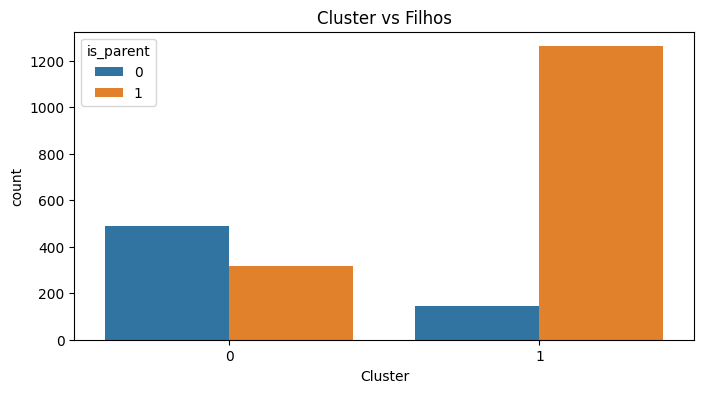

In [103]:
# Segundo gráfico
plt.figure(figsize=(8, 4))
sns.countplot(data=cluster_data, x="Cluster", hue="is_parent")
plt.title('Cluster vs Filhos')
plt.show()

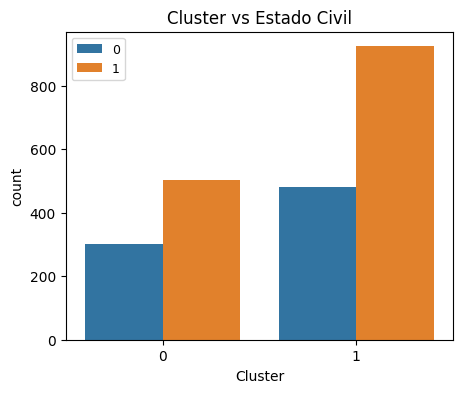

In [104]:
# Terceiro gráfico
plt.figure(figsize=(5, 4))
sns.countplot(data=cluster_data, x="Cluster", hue="estado_civil")
plt.title('Cluster vs Estado Civil')
plt.legend(fontsize=9)
plt.show()

<Axes: xlabel='Cluster', ylabel='total_gasto'>

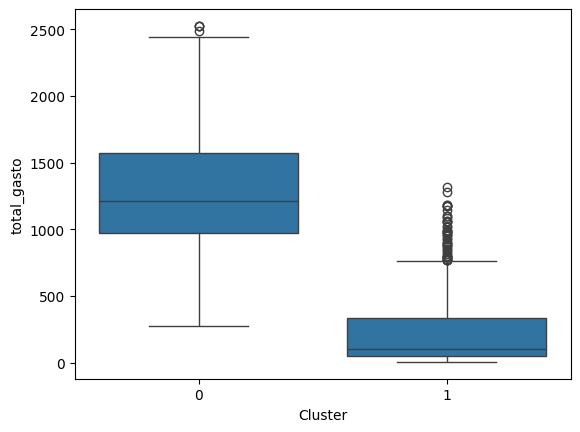

In [93]:
avg_spending = cluster_data.groupby("Cluster")[["total_gasto"]].mean()
sns.boxplot(data=cluster_data, x="Cluster", y="total_gasto")

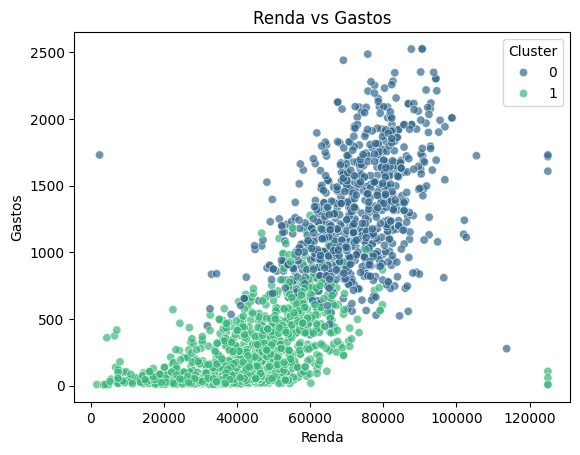

In [94]:
cluster_data["Income"] = cluster_data["Income"].clip(0, 125000)
sns.scatterplot(
    data=cluster_data,
    x="Income",
    y="total_gasto",
    hue="Cluster",
    palette="viridis",
    alpha=0.7,
)
plt.ylabel('Gastos')
plt.xlabel('Renda')
plt.title("Renda vs Gastos")
plt.show()

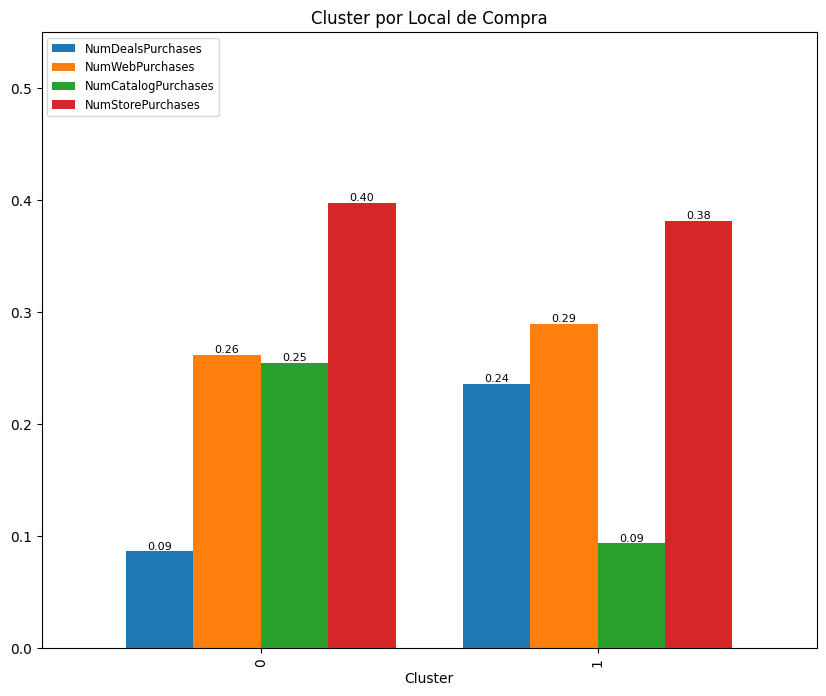

In [95]:
places = (
    "NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases".split()
)

by_place_of_purchase = cluster_data.groupby("Cluster")[places].sum()
by_place_of_purchase = by_place_of_purchase.apply(lambda x: x / np.sum(x), axis=1)

ax = plt.axes()
by_place_of_purchase.plot(kind="bar", figsize=(10, 8), ax=ax, width=0.8, ylim=(0, 0.55))
ax.legend(fontsize=8.3, loc=2)
for i in ax.containers:
    plt.bar_label(i, fmt="%.2f", fontsize=8)
ax.set_title("Cluster por Local de Compra")
plt.show()

In [96]:
spending_by_cluster = cluster_data.groupby("Cluster")["total_gasto"].sum()
commodities = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
avg_spending_by_commodity = cluster_data.groupby("Cluster")[commodities].sum()
proportion = avg_spending_by_commodity.T / spending_by_cluster
proportion.style.background_gradient(cmap="viridis", axis=0).set_caption("Gastos por tipo de produto"
)

Cluster,0,1
MntWines,0.481918,0.572893
MntFruits,0.046234,0.033657
MntMeatProducts,0.298758,0.195094
MntFishProducts,0.065801,0.049165
MntSweetProducts,0.047346,0.035066
MntGoldProds,0.059943,0.114125


Análise dos Clusters

Estado civil:
- 0 - Solteiro
- 1 - Casado/mora junto

Educação:
- 0 - Básico
- 1 - Graduado
- 2 - Pós-Graduado

#Cluster vs Educação 
- Cluster 0: neste cluster a maioria dos clientes é graduado e pós graduado.
- Cluster 1: neste cluster a maioria dos clientes também é graduado e pós-graduado

#Cluster vs Filhos
- Cluster 0: neste cluster a maioria dos clientes não possui filhos
- Cluster 1: neste cluster a maioria dos clientes possui filhos

#Cluster vs Estado civil
- Nos dois clusters a maioria dos clientes são casados

#Renda vs Gastos

- O cluster 0 possui uma renda maior e também gasta mais
- O cluster 1 possui uma renda menor e gasta menos 
- Isso também é visível no boxplot

#Cluster por Local de Compra
- Em ambos os clusters a maioria das compras foi feita na loja física, seguida pelas compras online. Porém, o cluster 1 (renda menor) aceitou mais promoções.

#Proporção de gastos por tipo de produto
- Em ambos os clusters o gasto maior foi com vinhos, no entanto, o cluster 0 gastou mais com carnes (maior renda)

Conclusão: 
- o cluster 0 é composto majoritariamente por clientes casados, com ensino superior, renda alta e sem filhos
- o cluster 1 também é composto majoritariamente por clientes casados e com ensino superior, porém com renda baixa e filhos
